## Reconstruction of systems of 1st order linear DEs by multiple time series

The method of choice is the analysis givven in [1] for time series' in a high dimensional space. First we explain the 1D approach by means of a Principle Component Analysis.

The basic principle is best explained in a 1D system. Given a time series $x(t)$ we are looking for a DE $\dot y(t)=f(y)$ which by integration reproduces the time series $x(t)$. To this end we minimize the mean square deviation
$$ W=\langle (\dot x(t)-f(x(t))^2\rangle $$
where
$$ \langle W(t)\rangle = \frac{1}{t_1-t_0}\int\limits_{t_0}^{t_1} W(t)dt $$
For $f(x(t))$ we make an ansatz $f(x(t))=\sum_i a_i\phi_i(x(t))$. Minimizing $W(t)$ gives the $a_i$ by $\frac{\partial W}{\partial a_i}=0$ to yield
$$ a_i=\langle \dot x\phi_j(x)\rangle D^{-1}_{ji}\mbox{ where } D_{ij}=\langle \phi_i(x)\phi_j(x)\rangle $$

For high dimensional Systems we introduce the coupling of the time series. Given a high dimensional signal $\mathbf{x}(t)$ we want to find the corresponding equation of motion. In this case we have for the component $i$ of the vector $\mathbf{f}$
$$ f_i(\mathbf{x}) = a_{ij}x_j+a_{ijk}x_jx_k\dots$$



[1] C. Uhl, Analyse raumzeitlicher Daten strukturbildender Systeme, Verlag Shaker (1995)

In [1]:
# []  K. Karhunen, "Zur Spektraltheorie stochastischer Prozesse," Ann. Acad. Sci. Fenn. A1, Math. Phys. 37 (1946)
# M. Loeve, “Fonctions aleatoires de second ordre,” Comptes Rendus De L'Académie Des Sciences, vol. 220, (1945).

In [2]:
from bs4 import BeautifulSoup
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
#
# Get the data
#
#html = open("table.html").read()
#soup = BeautifulSoup(html)
#table = soup.find("table")
filenameC='time_series_19-covid-Confirmed.csv'
#htmlC = open("TableC.html").read()
htmlC = open(filenameC).read()
soup = BeautifulSoup(htmlC)
TableC = soup.find("table")

In [4]:
# The header row
TableC_headrow= TableC.find('tr')
hcolumns = TableC_headrow.findAll('th')
output_row = []
output_rows = []
for column in hcolumns: output_row.append(column.text)
output_rows.append(output_row)

In [5]:
# Read data from the table
for TableC_row in TableC.findAll('tr'):
    columns = TableC_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    if len(output_row) > 1: output_rows.append(output_row)

In [6]:
# Create a dictionary with all countries an the total of confirmed cases
y={}
for i in np.arange(1,422):
    key=output_rows[i][2]
    if key in y: 
        y[key]=y[key]+np.asarray(output_rows[i][5:],dtype=int)
    else:
        y[key]=np.asarray(output_rows[i][5:],dtype=int)
x=np.arange(len(y.get('Germany')))
# Caution the following is only for logarithmic representation
ylog=y.copy()
for key in y.keys():
    ylog[key]=np.log10(ylog[key]+1)
# numerical ordering of countries NOT USED YES
# numbered=dict(zip(np.arange(len(y.keys())),y.keys()))

In [7]:
def plotcountry(Country,istart):
    fig, ax = plt.subplots()
    for c in Country: 
        #plt.plot(x[istart:],y.get(c)[istart:])
        ax.plot(x[istart:],y.get(c)[istart:],label=c)
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    #legend.get_frame().set_facecolor('C0')
    plt.show()
def plotcountryLog(Country,istart):
#    for c in Country: plt.plot(x[istart:],ylog.get(c)[istart:])
    fig, ax = plt.subplots()
    for c in Country: ax.plot(x[istart:],ylog.get(c)[istart:],label=c)
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    #legend.get_frame().set_facecolor('C0')
    plt.yticks([0,1,2,3,4])
    plt.show()

<IPython.core.display.Javascript object>


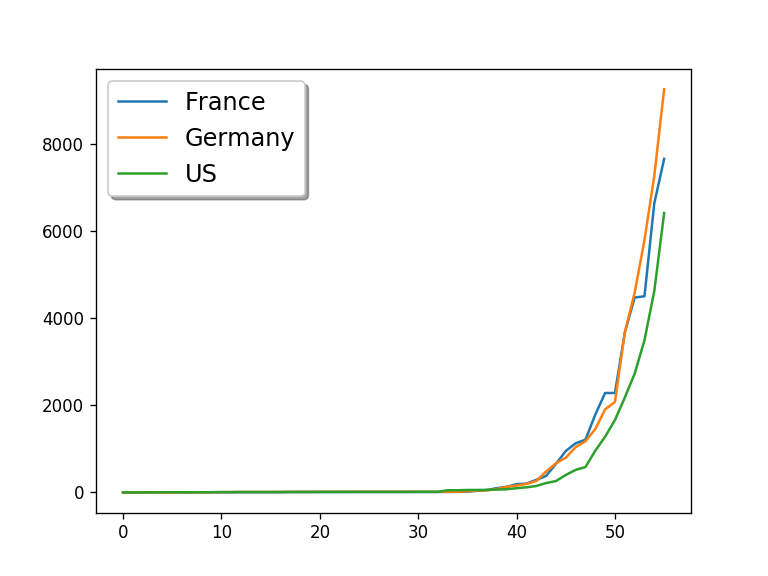

In [8]:
%matplotlib notebook
#del y['China']
#plotcountry(['Korea, South'],0)
plotcountry(['France','Germany','US'],0)

In [ ]:
# Maybe some day we need this
# numbered=dict(zip(np.arange(len(y.keys())),y.keys()))
#
# Define the model function $e^{a\cdot (x-x_0)}$
def model(x,a,x0):
    return np.exp(a*(x-x0))
# Fit to the model
xdata=np.arange(len(y.get('Germany')))
ydata=y.get('US')
popt,pcov = curve_fit(model,xdata,ydata)
popt

In [ ]:
np.gradient(y.get('Germany'), edge_order=2)

<IPython.core.display.Javascript object>


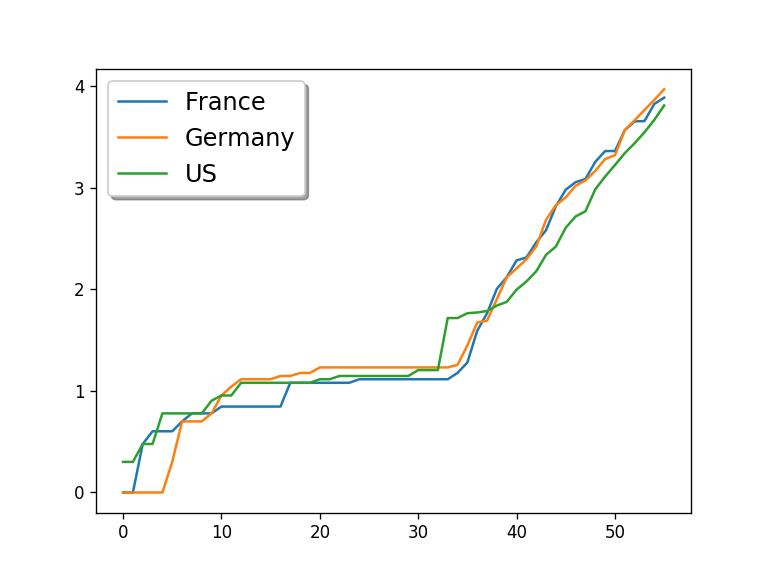

In [9]:
%matplotlib notebook
#del y['China']
#plotcountry(['Korea, South'],0)
plotcountryLog(['France','Germany','US'],0)

In [ ]:
output_rows

In [8]:
y.get('Germany')

array([   0,    0,    0,    0,    0,    1,    4,    4,    4,    5,    8,
         10,   12,   12,   12,   12,   13,   13,   14,   14,   16,   16,
         16,   16,   16,   16,   16,   16,   16,   16,   16,   16,   16,
         16,   17,   27,   46,   48,   79,  130,  159,  196,  262,  482,
        670,  799, 1040, 1176, 1457, 1908, 2078, 3675, 4585, 5795])